## Our data is a single-cell RNAseq dataset where columns are cells (cell types and cell states) and rows are the genes. It has to be tab-separated.

In [1]:
import pandas as pd

data = pd.read_csv("/Users/tgn531/Desktop/fava/Example_dataset_GSE75748_sc_cell_type_ec.tsv", 
                   sep='\t') 

### Our data look like this:

In [2]:
data

,H1_Exp1.001,H1_Exp1.002,H1_Exp1.003,H1_Exp1.004,H1_Exp1.006,H1_Exp1.007,H1_Exp1.008,H1_Exp1.009,H1_Exp1.010,H1_Exp1.011,...,TB_Batch2.135,TB_Batch2.136,TB_Batch2.137,TB_Batch2.138,TB_Batch2.139,TB_Batch2.140,TB_Batch2.141,TB_Batch2.142,TB_Batch2.143,TB_Batch2.144
MKL2,10.00,162.00,3.00,42.00,0.00,2.00,18.00,0.00,182.00,2.00,...,364.98,1.00,21.00,1127.80,2119.00,5.00,500.96,18.00,472.08,350.00
CD109,6.38,2.62,166.80,9.68,7.32,53.89,4.63,64.54,29.93,12.10,...,15.22,38.66,38.56,11.53,48.21,23.88,362.56,22.72,36.62,25.78
ABTB1,0.00,28.00,0.00,1.00,0.00,9.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,39.00,0.00
MAST2,0.00,133.00,41.00,0.00,0.00,2.00,0.00,0.00,0.00,8.00,...,175.00,41.00,32.00,3.00,6.00,206.00,43.04,2.00,1.00,99.00
KAT5,0.00,7.06,52.95,20.16,0.00,6.29,0.00,0.00,103.00,122.46,...,0.00,577.91,0.00,3.00,2.00,0.00,56.77,2.04,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDR33,101.00,201.44,23.31,164.65,181.49,135.93,233.00,105.00,215.98,371.10,...,512.80,9.86,776.49,1683.81,366.29,5.24,79.92,6.71,124.06,60.45
EPSTI1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,455.00,330.24,290.00,523.00,242.00,146.00,539.00,0.00,21.32,472.01
CLPTM1L,22.00,84.46,19.00,52.00,2.00,24.00,109.00,13.00,11.00,4.00,...,268.00,37.00,12.00,0.00,0.00,0.00,296.00,0.00,271.00,0.00
CCDC125,32.57,52.04,110.97,73.82,53.15,79.23,27.85,54.49,106.26,69.77,...,276.59,244.83,246.80,167.79,336.73,221.86,166.23,131.41,730.10,297.28


## Import FAVA

In [3]:
from favapy import fava

### FAVA provides multiple parameters, but the only mandatory one is the data path. After defining the location of the data, users could optionally define the other parameters.
#### The dimensions of the hidden layer (intermediate_dim).  Default value = 500.
#### The dimensions of the latent space (latent_dim). Default value = 100.
#### The number of epochs (epochs). Default value = 100.
#### The batch size (batch_size). Default value = 32.
#### The cut-off on the Pearson Correlation scores (PCC_cutoff). Default value = 0.7.


In [4]:
#The function we want to call is the fava_notebook
my_FAVAourite_network = fava.cook("/Users/tgn531/Desktop/fava/Example_dataset_GSE75748_sc_cell_type_ec.tsv", 
                             epochs=5, 
                             PCC_cutoff=0.98)


Epoch 1/5
597/597 [==============================] - 6s 9ms/step - loss: 36.1505 - accuracy: 0.0048 - val_loss: 31.2812 - val_accuracy: 0.0087
Epoch 2/5
597/597 [==============================] - 5s 8ms/step - loss: 29.0041 - accuracy: 0.0090 - val_loss: 28.0603 - val_accuracy: 0.0105
Epoch 3/5
597/597 [==============================] - 5s 8ms/step - loss: 27.5662 - accuracy: 0.0130 - val_loss: 27.2091 - val_accuracy: 0.0123
Epoch 4/5
597/597 [==============================] - 5s 8ms/step - loss: 27.0376 - accuracy: 0.0159 - val_loss: 26.7972 - val_accuracy: 0.0149
Epoch 5/5
597/597 [==============================] - 5s 8ms/step - loss: 26.6534 - accuracy: 0.0229 - val_loss: 26.2128 - val_accuracy: 0.0234


In [5]:
my_FAVAourite_network

,Protein_1,Protein_2,Score
209591662,SULT1A4,SULT1A3,0.989058
39866414,SULT1A3,SULT1A4,0.989058
56461975,MYLK3,SLC24A4,0.988936
214710527,SLC24A4,MYLK3,0.988936
223399447,CD84,CYP1A2,0.988679
...,...,...,...
4870717,RPL27,RPL5,0.980014
144722541,LOC100506688,ANKS4B,0.980012
104563653,ANKS4B,LOC100506688,0.980012
170610908,RPS15A,RPL8,0.980004


In [6]:
my_FAVAourite_network_single = my_FAVAourite_network.iloc[::2, :]
my_FAVAourite_network_single


,Protein_1,Protein_2,Score
209591662,SULT1A4,SULT1A3,0.989058
56461975,MYLK3,SLC24A4,0.988936
223399447,CD84,CYP1A2,0.988679
52347833,CYP1A2,MYLK3,0.988590
103601062,BOLA2B,BOLA2,0.988554
...,...,...,...
235238223,RPS8,RPL14,0.980015
223404934,CD84,CAMK1D,0.980014
18753509,RPL5,RPL27,0.980014
144722541,LOC100506688,ANKS4B,0.980012


In [7]:
import networkx as nx

In [8]:
G = nx.from_pandas_edgelist(my_FAVAourite_network_single,
                           source = 'Protein_1',
                           target = 'Protein_2',
                           edge_attr = 'Score')

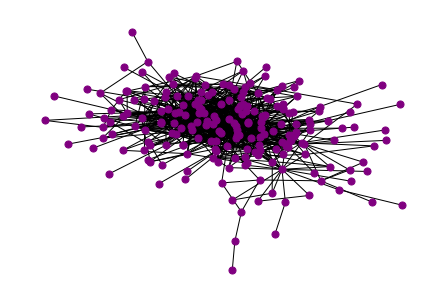

In [9]:
nx.draw_kamada_kawai(G, node_size = 50, node_color="purple")

In [10]:
from pyvis.network import Network

In [11]:
net = Network(height='800px', width='100%', bgcolor='#ffffff', 
                font_color='black',notebook = True, directed=False)
net.from_nx(G)
net.show_buttons(filter_='physics')
#generate html file
net.show("fava.html")

### Playing with VAEs to extract only the latent space

In [12]:
import numpy as np

data_array = np.log(np.asarray(data, dtype=np.float32)) / np.max(np.log(np.asarray(data)), axis=1, keepdims=True)
data_array[np.isneginf(data_array)] = 0
data_array = np.nan_to_num(data_array)
data_array = data_array[:229,:]


In [13]:
import tensorflow as tf

batch_size = 32
original_dim = data_array.shape[1]
intermediate_dim = 50
latent_dim = 3
epochs = 5
x_train = x_test = data_array
opt = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=0.001)

vae = fava.VAE(opt, x_train, x_test, batch_size, original_dim, intermediate_dim, latent_dim, epochs)
latent_space = np.array(vae.encoder.predict(x_test, batch_size=batch_size))


Epoch 1/5
8/8 [==============================] - 1s 27ms/step - loss: 137.9359 - accuracy: 0.0044 - val_loss: 136.9268 - val_accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 136.0271 - accuracy: 0.0000e+00 - val_loss: 134.2676 - val_accuracy: 0.0044
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 132.8858 - accuracy: 0.0000e+00 - val_loss: 129.9063 - val_accuracy: 0.0044
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 128.0654 - accuracy: 0.0000e+00 - val_loss: 123.8713 - val_accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 121.6102 - accuracy: 0.0000e+00 - val_loss: 116.0905 - val_accuracy: 0.0000e+00


In [14]:
latent_space = pd.DataFrame(latent_space[:,:,0].T)
latent_space.index = data.index[:229]
latent_space

,0,1,2
MKL2,1.947414,-0.572090,2.023367
CD109,0.839471,-1.249325,0.808810
ABTB1,1.713991,-0.164380,1.815031
MAST2,0.897930,-0.133538,0.863846
KAT5,3.073989,-0.147403,3.057135
...,...,...,...
KDELR1,0.083081,-1.843928,0.078307
PCDHB6,0.320731,0.045058,0.221517
KPNA2,0.247282,-1.998384,0.243717
ZNF705D,0.589969,0.025559,0.758946
